<a href="https://colab.research.google.com/github/saisampaththumati-datascientists/NLP-natural_learning_language-/blob/main/NLP_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# importing the re text prepossing
import re
from transformers import BarthezTokenizer, TFBartForSequenceClassification,BertTokenizer,TFBertForSequenceClassification

In [ ]:
df= pd.read_csv("/content/Articles (2).csv")
df.head()

,Date published,Category,Section,Headline,Description,Keywords,Article text
0,2021-07-15 02:46:59,news,world,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","(CNN)Right now, there's a shortage of truck d..."
1,2021-05-12 07:52:09,news,world,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",(CNN)Working in a factory or warehouse can me...
2,2021-06-16 02:51:30,news,asia,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...","(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,2022-03-15 09:57:36,business,investing,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...","New York (CNN Business)For many years, the wor..."
4,2022-03-15 11:27:02,business,business,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",The European Union formally approved on Tuesda...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date published  4076 non-null   object
 1   Category        4076 non-null   object
 2   Section         4076 non-null   object
 3   Headline        4076 non-null   object
 4   Description     4076 non-null   object
 5   Keywords        4076 non-null   object
 6   Article text    4076 non-null   object
dtypes: object(7)
memory usage: 223.0+ KB


In [ ]:
df.describe()

,Date published,Category,Section,Headline,Description,Keywords,Article text
count,4076,4076,4076,4076,4076,4076,4076
unique,4076,6,37,4071,4069,4071,4075
top,2021-12-01 14:32:33,sport,sport,Here's who won gold medals at the Tokyo Olympi...,Austria's Chancellor Sebastian Kurz said in a ...,"sport, Here's who won gold medals at the Tokyo...","(CNN)It has been delayed by a year, but that ..."
freq,1,2176,1088,2,2,2,2


In [ ]:
df.loc[3,"Article text"]

'New York (CNN Business)For many years, the world\'s most popular emerging markets have been the so-called BRICS: Brazil, Russia, India, China and South Africa.But given that Russia is no longer a market that Westerners can access following the invasion of Ukraine, it might be time for investors to stop lumping all of the emerging markets together."The BRICS had their day in the sun and that has faded," said Eric Winograd, senior economist at AllianceBernstein.Several major US index providers have removed Russian stocks from indexes at a price of "zero" or "effectively zero." Trading shares of several leading US-listed Russian companies, such as search engine Yandex and telecom MTS, have been halted. And the Moscow Stock Exchange has been closed since February 25, the day after the invasion.Russia could default on its debt within days"The idea that a country as large as Russia can be removed from indexes is a big deal," Winograd said.Read MoreIt seems likely that Russia will not be inc

In [ ]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-11-1efd3ad12d5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


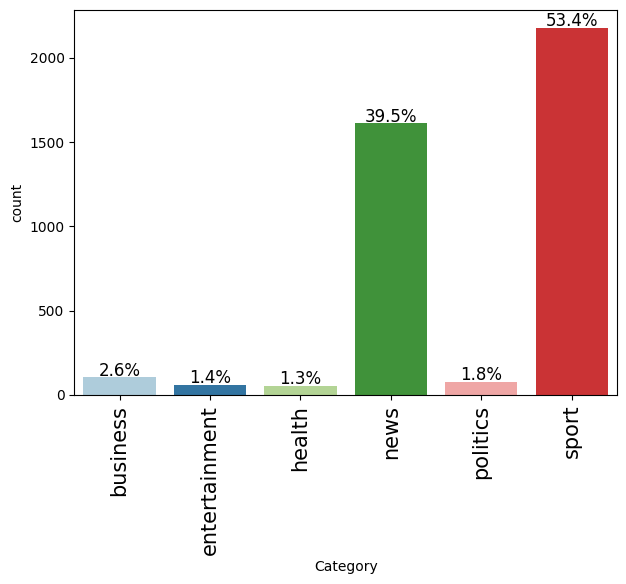

In [ ]:
labeled_barplot(df,"Category",perc=True);

<ipython-input-11-1efd3ad12d5f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


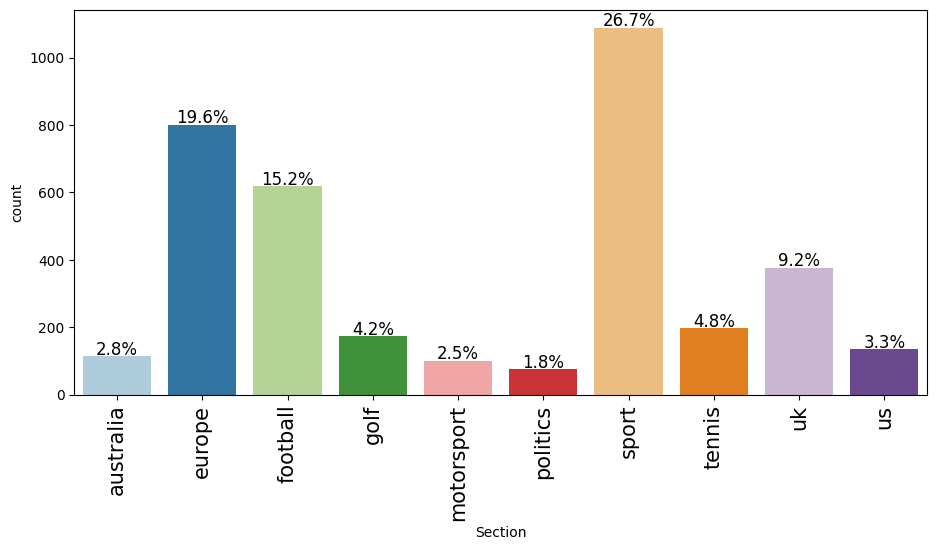

In [ ]:
labeled_barplot(df,"Section",perc=True,n=10);

In [ ]:
## data pre processing
def Data_cleaning(text):
  #convering the to lower case
  text=text.lower()
  # removing the special characters and numbers
  text=re.sub(r'[^A-Za-z\s]','',text)
  #remove the space
  text=re.sub(r'\s+'," ",text)
  return text



In [ ]:
df["Article_text_clean"]=df["Article text"].apply(Data_cleaning)
df["Article_text_clean"][1]

' cnnworking in a factory or warehouse can mean doing the same task over and over and that repetition can lead to chronic injury now a batterypowered glove could help workers by taking some of the strainthe ironhand glove strengthens the wearers grip meaning they dont have to use as much force to perform repetitive manual tasks its developer bioservo says it can increase the wearers hand strength by the swedish company describes the system as a soft exoskeleton exoskeletons are an external device that supports and protects the body typically increasing strength and endurance most have a rigid structure but the ironhand is soft like a regular glove photos the robots running our warehousesrobots are an increasingly familiar presence in warehouses at the southeast london warehouse run by british online supermarket ocado robots fulfill shopping orders when an order is sent to the warehouse the bots spring to life and head towards the container they require scroll through to see more robots

In [ ]:
df

,Date published,Category,Section,Headline,Description,Keywords,Article text,Article_text_clean
0,2021-07-15 02:46:59,news,world,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","(CNN)Right now, there's a shortage of truck d...",cnnright now theres a shortage of truck drive...
1,2021-05-12 07:52:09,news,world,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",(CNN)Working in a factory or warehouse can me...,cnnworking in a factory or warehouse can mean...
2,2021-06-16 02:51:30,news,asia,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...","(CNN)In a Hong Kong warehouse, a swarm of aut...",cnnin a hong kong warehouse a swarm of autono...
3,2022-03-15 09:57:36,business,investing,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...","New York (CNN Business)For many years, the wor...",new york cnn businessfor many years the worlds...
4,2022-03-15 11:27:02,business,business,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",The European Union formally approved on Tuesda...,the european union formally approved on tuesda...
...,...,...,...,...,...,...,...,...
4071,2021-12-01 10:01:29,sport,tennis,Australian Open: Australia's vaccine mandate i...,The Australian Open's Covid-19 vaccine mandate...,"tennis, Australian Open: Australia's vaccine m...",(Reuters)The Australian Open's Covid-19 vacci...,reutersthe australian opens covid vaccine man...
4072,2021-12-01 17:56:15,sport,golf,Four golfers test positive ahead of South Afri...,Four golfers scheduled to play in the South Af...,"golf, Four golfers test positive ahead of Sout...",(CNN)Four golfers scheduled to play in the So...,cnnfour golfers scheduled to play in the sout...
4073,2021-12-01 11:32:15,sport,tennis,Peng Shuai: 'Unanimous conclusion' that tennis...,Long-time International Olympic Committee (IOC...,"tennis, Peng Shuai: 'Unanimous conclusion' tha...",(CNN)Long-time International Olympic Committe...,cnnlongtime international olympic committee i...
4074,2021-12-01 17:27:34,news,europe,"This company is ""zapping"" cow dung with lightn...",A Norwegian technology company has found a way...,"europe, This company is ""zapping"" cow dung wit...",A Norwegian technology company has found a way...,a norwegian technology company has found a way...


## Splitting Data

In [ ]:
# Creating dependent and independent variables
X = df['Article_text_clean']
y = df['Category']

In [ ]:
x_train,x_temp,y_train,y_temp= train_test_split(X,y,random_state=1,shuffle=True,test_size=0.30)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,shuffle=True,random_state=1,test_size=0.30)
x_test.shape,x_val.shape,x_train.shape

((367,), (856,), (2853,))

In [ ]:
encoder =LabelEncoder()
y_train_en= encoder.fit_transform(y_train)
y_test_en=encoder.transform(y_test)
y_val_en=encoder.transform(y_val)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
max_length=512

In [ ]:
tokenizer

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
X_train_tokenized = tokenizer(
    x_train.values.tolist(),    # passing the data as a list to the tokenizer
    max_length=max_length,    # specifies the maximum length of the tokenized data
    padding='max_length',    # padding the data to the specified maximum length
    truncation=True,    # truncating the input if it is longer than the specified maximum length
    return_attention_mask=True,    # specifying to return attention masks
    return_tensors='tf',    # specifying to return the output as tensorflow tensors
)

In [ ]:
X_train_tokenized

{'input_ids': <tf.Tensor: shape=(2853, 512), dtype=int32, numpy=
array([[  101, 13229, 11236, ...,  2480,  5196,   102],
       [  101, 13229,  3270, ...,  2003,  2045,   102],
       [  101, 13229,  9103, ...,  1997,  1996,   102],
       ...,
       [  101, 13229, 10760, ...,     0,     0,     0],
       [  101,  5553,  2638, ...,  6043,  6464,   102],
       [  101, 13229, 24415, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(2853, 512), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2853, 512), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0]], dtype=in

In [ ]:
X_valid_tokenized = tokenizer(
    x_val.values.tolist(),
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='tf',
)

In [ ]:
X_test_tockenized=tokenizer(
    x_test.values.tolist(),
    max_length=max_length,
    padding="max_length",
    truncation=True,
    return_attention_mask=True,
    return_tensors='tf',
)

In [ ]:
X_valid_tokenized

{'input_ids': <tf.Tensor: shape=(856, 512), dtype=int32, numpy=
array([[  101,  2414, 13229, ...,  2369,  1998,   102],
       [  101, 13229, 10760, ...,  2050, 15456,   102],
       [  101, 13229, 10631, ...,  2079,  2000,   102],
       ...,
       [  101,  4199, 13229, ...,     0,     0,     0],
       [  101, 13229, 10760, ...,  2847,  2077,   102],
       [  101, 13229, 10760, ...,  2019,  2035,   102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(856, 512), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(856, 512), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32

# converting to data set


In [ ]:
batch_size=8
train_tockenized_tf= tf.data.Dataset.from_tensor_slices((dict(X_train_tokenized),y_train_en)).batch(batch_size)

In [ ]:
val_tockenized_tf=tf.data.Dataset.from_tensor_slices((dict(X_valid_tokenized),y_val_en)).batch(batch_size)

In [ ]:
test_tockenized_tf=tf.data.Dataset.from_tensor_slices((dict(X_test_tockenized),y_test_en)).batch(batch_size)

## Model building

In [ ]:
test_tockenized_tf

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
n_num=y.nunique()
n_num

6

In [ ]:
# Model initialization using BERT for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=n_num)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  4614      
                                                                 
Total params: 109486854 (417.66 MB)
Trainable params: 109486854 (417.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Fine Tuning
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimer=tf.keras.optimizers.Adam(learning_rate=0.0001,epsilon=1e-08)
metrics=["accuracy"]
model.compile(optimizer=optimer,loss=loss,metrics=metrics)

In [ ]:
(y_train_en.shape[0]) / np.bincount(y_train_en)

array([38.55405405, 63.4       , 67.92857143,  2.53149956, 59.4375    ,
        1.88068556])

In [ ]:
np.bincount(y_train_en)

array([  74,   45,   42, 1127,   48, 1517])

In [ ]:
y_train_en

array([5, 5, 5, ..., 5, 0, 5])

In [ ]:
y_train_en.shape[0]

2853

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train_en.shape[0]) / np.bincount(y_train_en)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[encoder.transform(encoder.classes_)[i]] = cw[i]

In [ ]:
cw

array([38.55405405, 63.4       , 67.92857143,  2.53149956, 59.4375    ,
        1.88068556])

In [ ]:
# Number of training epochs
n_epochs = 3

bert_base_tuned = model.fit(train_tockenized_tf, epochs=n_epochs, validation_data=val_tockenized_tf, class_weight=cw_dict)

Epoch 1/3


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
357/357 [==============================] - 186s 300ms/step - loss: 11.0794 - accuracy: 0.0883 - val_loss: 1.7056 - val_accuracy: 0.0245
Epoch 2/3
357/357 [==============================] - 90s 253ms/step - loss: 10.9833 - accuracy: 0.0691 - val_loss: 1.6545 - val_accuracy: 0.5409
Epoch 3/3
357/357 [==============================] - 90s 253ms/step - loss: 10.9550 - accuracy: 0.0698 - val_loss: 1.7683 - val_accuracy: 0.0070


In [ ]:
# Generate raw predictions on the validation dataset using the trained model
preds_raw_val = model.predict(val_tockenized_tf)

# Extract predicted labels by finding the index with the highest probability for each example
preds_val = np.argmax(np.array(tf.nn.softmax(preds_raw_val.logits)), axis=1)

# Display the shape of the predicted labels array
preds_val.shape

107/107 [==============================] - 18s 84ms/step


(856,)

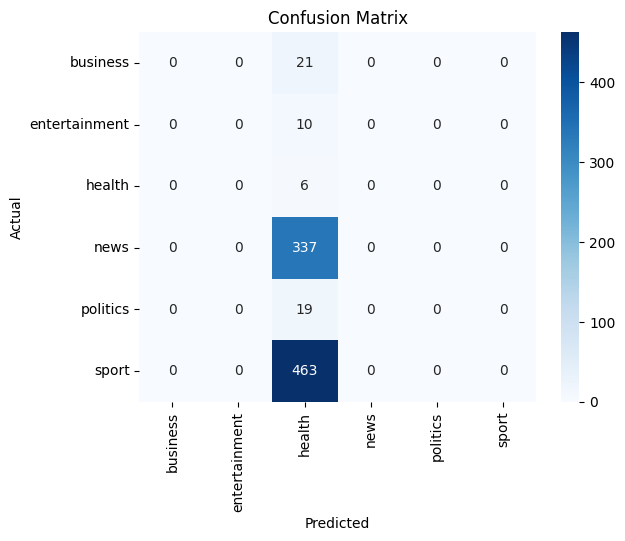

In [ ]:
# retrieving the labels from the tensorflow dataset
actual_val = np.concatenate([y for x, y in val_tockenized_tf], axis=0)

# Creating confusion matrix
cnf_mt = metrics.confusion_matrix(actual_val, preds_val)

# Visualizing confusion matrix using a heatmap
labels = encoder.classes_.tolist()
sns.heatmap(cnf_mt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Display classification report
print('Classification Report:')
print(metrics.classification_report(actual_val, preds_val))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        10
           2       0.01      1.00      0.01         6
           3       0.00      0.00      0.00       337
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00       463

    accuracy                           0.01       856
   macro avg       0.00      0.17      0.00       856
weighted avg       0.00      0.01      0.00       856



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Predictions
preds_raw_test = model.predict(test_tockenized_tf)
preds_test = np.argmax(np.array(tf.nn.softmax(preds_raw_test.logits)), axis=1)
preds_test.shape

46/46 [==============================] - 4s 84ms/step


(367,)

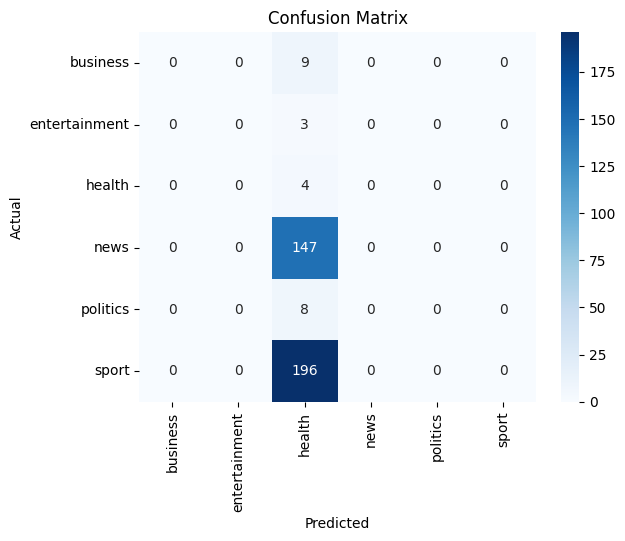

In [ ]:
# retrieving the labels from the tensorflow dataset
actual_test = np.concatenate([y for x, y in test_tockenized_tf], axis=0)

# Creating confusion matrix
cnf_mt = metrics.confusion_matrix(actual_test, preds_test)

# Visualizing confusion matrix using a heatmap
labels = encoder.classes_.tolist()
sns.heatmap(cnf_mt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Display classification report
print('Classification Report:')
print(metrics.classification_report(actual_test, preds_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         3
           2       0.01      1.00      0.02         4
           3       0.00      0.00      0.00       147
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00       196

    accuracy                           0.01       367
   macro avg       0.00      0.17      0.00       367
weighted avg       0.00      0.01      0.00       367



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
